#  <span style="color:Black">Intrinsic dimension, $\mathcal{D}_{\text{int}}$, across MBL phase-transition</span>
<img src="figures/2nn_many_L14.png"
     alt="Markdown Monster icon"
     style="float: right; margin-right: 100px;"
     width="50%"/>
This notebook contains dimension analysis of the many-body localization (MBL) transition via two-nearest-neighbours (2NN). The notebook is split into parts as delineated in the contents section below.

1. **Generating data**
1. **Weight distribution within eigenvectors**
1. **2NN**
    1. Single
    1. Many
    1. Average
    1. Scaling collapse
1. **Data from Cluster**
    1. Many
    1. Scaling collapse

In [5]:
# packages
import numpy as np  # matrix and vector operations
import matplotlib.pyplot as plt  # visualization
import fssa as fssa  # scaling collapse 
from utils import *  # all things ID of MBL
from time import time

## 1. Generating data

In [2]:
Ls, num_seeds, location_raw = [14], 20, 'data/raw/'

# disorder levels
min_disorder, max_disorder, steps = 0.5, 9.5, 11
ws=np.linspace(min_disorder, max_disorder, steps)

'''to generate data: uncomment the line below 👇'''
[buildDiagSave(L, num_seeds, ws, location = location_raw) for L in Ls]

  0%|          | 0/11 [00:00<?, ?it/s]

data/raw/eigvecs-L-14-W-0.5-seed-0.npy exists
data/raw/eigvecs-L-14-W-0.5-seed-1.npy exists


  9%|▉         | 1/11 [02:12<22:05, 132.60s/it]

data/raw/eigvecs-L-14-W-1.4-seed-0.npy exists
data/raw/eigvecs-L-14-W-1.4-seed-1.npy exists


 18%|█▊        | 2/11 [03:55<17:13, 114.84s/it]

data/raw/eigvecs-L-14-W-2.3-seed-0.npy exists
data/raw/eigvecs-L-14-W-2.3-seed-1.npy exists


 27%|██▋       | 3/11 [05:38<14:37, 109.71s/it]

data/raw/eigvecs-L-14-W-3.2-seed-0.npy exists
data/raw/eigvecs-L-14-W-3.2-seed-1.npy exists


 36%|███▋      | 4/11 [07:18<12:21, 105.95s/it]

data/raw/eigvecs-L-14-W-4.1-seed-0.npy exists
data/raw/eigvecs-L-14-W-4.1-seed-1.npy exists


 45%|████▌     | 5/11 [09:39<11:50, 118.38s/it]

data/raw/eigvecs-L-14-W-5.0-seed-0.npy exists
data/raw/eigvecs-L-14-W-5.0-seed-1.npy exists


 55%|█████▍    | 6/11 [11:53<10:19, 123.85s/it]

data/raw/eigvecs-L-14-W-5.9-seed-0.npy exists
data/raw/eigvecs-L-14-W-5.9-seed-1.npy exists


 64%|██████▎   | 7/11 [13:26<07:34, 113.60s/it]

data/raw/eigvecs-L-14-W-6.8-seed-0.npy exists
data/raw/eigvecs-L-14-W-6.8-seed-1.npy exists


 73%|███████▎  | 8/11 [14:57<05:19, 106.41s/it]

data/raw/eigvecs-L-14-W-7.7-seed-0.npy exists
data/raw/eigvecs-L-14-W-7.7-seed-1.npy exists


 82%|████████▏ | 9/11 [16:27<03:22, 101.48s/it]

data/raw/eigvecs-L-14-W-8.6-seed-0.npy exists
data/raw/eigvecs-L-14-W-8.6-seed-1.npy exists


 91%|█████████ | 10/11 [17:58<01:38, 98.20s/it]

data/raw/eigvecs-L-14-W-9.5-seed-0.npy exists
data/raw/eigvecs-L-14-W-9.5-seed-1.npy exists


100%|██████████| 11/11 [19:29<00:00, 106.34s/it]


['success']

## 2. EigenComponent Dominance
We may investigate whether there is a change in intrinsic dimension across the phase transition by looking at the weight distribution within eigenvectors. A decrease in intrinsic dimension is indicated by a consolidation of weight in an eigenvector.

In [3]:
L = Ls[-1]
maxs, below_lims, lims = eigenC_analysis(ws, num_lims=5, num_seeds=num_seeds, L = L, location=location_raw)

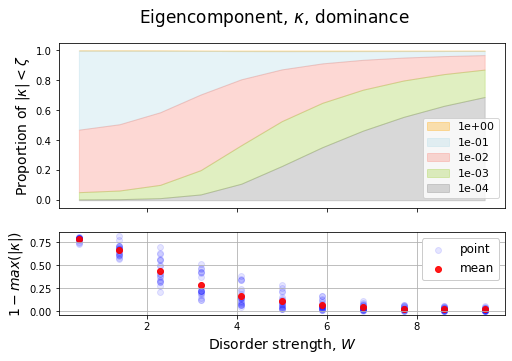

In [18]:
eigenC_plots(below_lims, maxs.T, ws, lims, num_seeds=num_seeds)
filename_fig = 'figures/EigCDom-L{}-seeds{}-ws{}.png'.format(L,num_seeds,len(ws))
plt.savefig(filename_fig, dpi=500, bbox_inches='tight')

In [8]:
np.savez('data/eigC/eigC_L14_s_20.npz',np.array([maxs,below_lims, lims], dtype=object))

In [17]:
def eigenC_plots(below_lims, maxs, ws,
                 lims = np.logspace((1-8),0,8),
                 num_seeds =10, L=8,
                 colors = 'orange, lightblue, salmon, yellowgreen, grey, purple'.split(', ')
                ):
    # Plot 1: proportion below threshhold
    mean_below = np.mean(below_lims,axis=2).T[::-1]
    fig, ax  = plt.subplots(2,1, sharex=True, 
                           gridspec_kw={'height_ratios':[2,1]},
                           figsize=(8,5))
    #print(len(mean_below))
    for i, color in zip(range(len(mean_below)), colors):
        #print(i)
        try:
            ax[0].fill_between(ws, mean_below[i], mean_below[i+1],
                         label="{:.0e}".format(lims[::-1][i]),
                         color=color, alpha=.3)
        except IndexError:
            ax[0].fill_between(ws, 0, mean_below[i],
                         label="{:.0e}".format(lims[::-1][i]),
                         color=color, alpha=.3)
		
    
    # Plot 2: Maxs
    for index, i in enumerate(maxs):
        ax[1].scatter([ws[index]]*num_seeds, 1-i, c='b', alpha=2/num_seeds)
        ax[1].scatter([ws[index]], 1-np.mean(i), c='r', alpha=0.9)

    ax[1].grid()
    # Labels and such
    ax[0].legend(fontsize=11, bbox_to_anchor=(1, .58),)
    ax[0].set_ylabel('Proportion of $|\kappa|<\zeta$ ', fontsize=14)
    ax[1].legend(["point", "mean"],#bbox_to_anchor=(0.2, .25),
    	facecolor='white', framealpha=1,
        fontsize=12)
    plt.xlabel('Disorder strength, $W$', fontsize=14)
    ax[1].set_ylabel('$1-max(|\kappa|)$', fontsize=14)    
    plt.suptitle('Eigencomponent, $\kappa$, dominance', fontsize=17)

## 3. 2NN
2NN is a neighbour graph algo. which determines the intrinsic dimension of a dataset -- when applied to a list of eigenvectors corresponding to one realization of a single disorder strength.

### A. Single

In [20]:
ws

array([0.5, 1.4, 2.3, 3.2, 4.1, 5. , 5.9, 6.8, 7.7, 8.6, 9.5])

In [24]:
L = 14
W = ws[-3]
seed = 3
filename = location_raw+'eigvecs-L-{L}-W-{W}-seed-{seed}.npy'.format(L=L, W=W, seed=seed)
eigs = np.load(filename)
slope, chi2 = nn2(eigs, plot=True)

filename_fig = 'figures/2nnSingle_L{}_W{}_s{}.png'.format(L,W,seed)
plt.savefig(filename_fig, dpi=500, bbox_inches='tight')
slope, chi2

KeyboardInterrupt: 

### B. Many

In [5]:
filename = 'data/intrinsicDim/'+'ID_and_chi2_L[{}_{}]_ws{}_seeds{}.npz'.format(min(Ls),max(Ls), len(ws), num_seeds)
ID_and_chi2 = np.load(filename, allow_pickle=True)['ID_and_chi2'][()]

ID = np.array([[[ID_and_chi2[L][W]['ID'][seed]for L in Ls]for seed in range(num_seeds)]for W in ws]).T
chi2 = np.array([[[ID_and_chi2[L][W]['chi2'][seed]for L in Ls]for seed in range(num_seeds)]for W in ws]).T

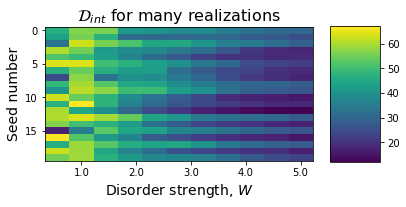

In [6]:
plt.imshow(ID[-1], cmap = 'viridis', aspect=.5*ID.shape[2]/ID.shape[1])
plt.title('$\mathcal{D}_{int}$ for many realizations', fontsize=16)
plt.ylabel('Seed number', fontsize=14)
plt.xlabel('Disorder strength, $W$', fontsize=14)
plt.xticks(np.linspace(1,len(ws)-1, 5), [ws[1+len(ws)//5*i] for i in range(5)])
plt.colorbar(aspect=2.7)
plt.show()

### C. Averaging
By performing 2NN on eigenvectors from many disorder strengths and averaging across many realization, we obtain a general trend. 

We can improve results by including a weight when averaging. The weight is determined by the quality of individual 2NN fits.

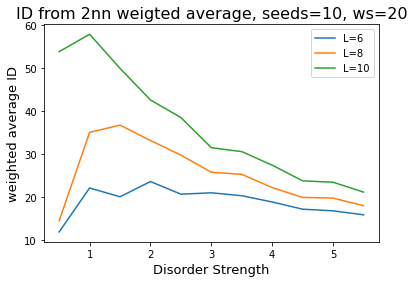

In [7]:
ID_avgs = np.average(ID, axis=1, weights=1/chi2)

for index, L in enumerate(Ls):
    plt.plot(ws,ID_avgs[index], label='L={}'.format(L))
    
plt.legend()
plt.xlabel('Disorder Strength', fontsize=13)
plt.ylabel('weighted average ID', fontsize=13)
plt.title('ID from 2nn weigted average, seeds={}, ws={}'.format(L,num_seeds,len(ws)), fontsize=16)
plt.show()

### D. Scaling collapse
To obtain the critical disorder strength, we may collapse our data from different L's
see: https://pyfssa.readthedocs.io/en/stable/tutorial.html

autoscale done
Scale data done
criticality: $W_c=$ 4.257960664362278 $\pm$ 0.7425903877774798


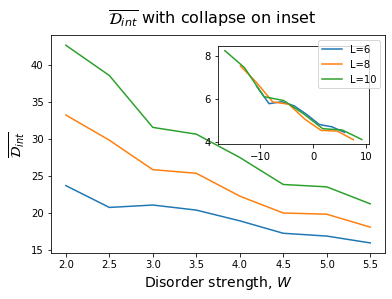

In [28]:
res = scale_collapse2(ID_avgs, ws, Ls=Ls, skip_initial=3)
print('criticality: $W_c=$ {} $\pm$ {}'.format(res['rho'], res['drho']))

## 4. Data from cluster

In [6]:
location_cluster = 'data/cluster/'

### A. Many

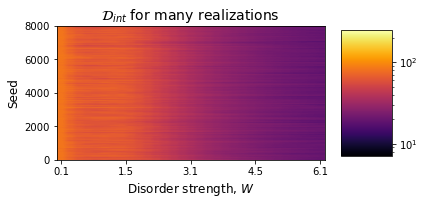

In [7]:
filename = location_cluster+'2nn-{}-combined.npy'.format(14)
from matplotlib.colors import LogNorm
data = np.load(filename)
data
ws_cluster = np.linspace(0.1,6.1,31)
imshow = plt.imshow(data,
           aspect=.5*data.shape[1]/data.shape[0],cmap = 'inferno', norm=LogNorm())


plt.colorbar(aspect=2.5, )
plt.title('$\mathcal{D}_{int}$ for many realizations', fontsize=14)
plt.ylabel('Seed', fontsize=12)
plt.xlabel('Disorder strength, $W$', fontsize=12)
plt.xticks(np.linspace(0,30,5), [round(ws_cluster[int(7.5*i)],1) for i in range(5)])
ax = imshow.axes
ax.invert_yaxis()
plt.savefig('figures/2nn_many_L14.png', dpi=420)

### B. Scaling collapse

autoscale done
Scale data done


skip= 7 criticality: $W_c=$ 3.6517548433076086 $\pm$ 0.21975637931387054


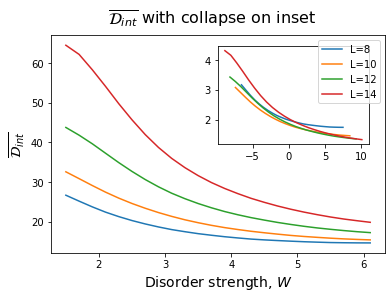

In [9]:

ws_cluster = np.linspace(0.1,6.1,31)
Ls_cluster = [8,10,12,14]
ID_mean = np.zeros((len(Ls_cluster),len(ws_cluster)))
ID_std = np.zeros((len(Ls_cluster),len(ws_cluster)))
ID_var = np.zeros((len(Ls_cluster),len(ws_cluster)))
#DATA = []
for index, L in enumerate(Ls_cluster):
    filename = location_cluster+'2nn-{}-combined.npy'.format(L)
    data = np.load(filename)
    #DATA.append(data)
    averaged = np.mean(data,axis=0)
    std = np.std(data,axis=0)
    ID_mean[index] = averaged
    ID_std[index] = std
    ID_var[index] = np.var(data,axis=0)
    
skip_init = 7
res = scale_collapse2(ID_mean, ws_cluster, Ls_cluster, skip_initial=skip_init)
print('\n\nskip=',skip_init,'criticality: $W_c=$ {} $\pm$ {}'.format(res['rho'], res['drho']))
plt.savefig('figures/collapsed_skip{}.png'.format(skip_init), dpi=420)

In [10]:
res

           dnu: 0.13813234802591634
          drho: 0.21975637931387054
         dzeta: 0.56209548090223
        errors: array([0.21975638, 0.13813235, 0.56209548])
 final_simplex: (array([[3.65175484, 1.86900897, 1.91551109],
       [3.65029014, 1.86823051, 1.91261186],
       [3.65112097, 1.86898095, 1.91365492],
       [3.65153958, 1.86923832, 1.91257111]]), array([60.72820494, 60.73164984, 60.73540668, 60.73657078]))
           fun: 60.728204935786614
       message: 'Optimization terminated successfully.'
          nfev: 77
           nit: 38
            nu: 1.8690089739302957
           rho: 3.6517548433076086
        status: 0
       success: True
         varco: array([[ 0.04829287,  0.03017103, -0.12065894],
       [ 0.03017103,  0.01908055, -0.07373735],
       [-0.12065894, -0.07373735,  0.31595133]])
             x: array([3.65175484, 1.86900897, 1.91551109])
          zeta: 1.9155110855464819

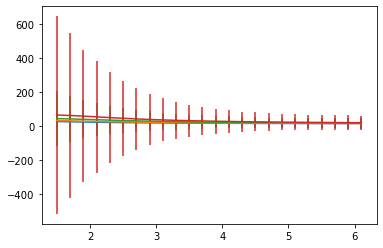

In [15]:
plt.figure()
for ID, std in zip(ID_mean, ID_var):
    
    plt.errorbar(ws_cluster[skip_init:], ID[skip_init:], yerr=std[skip_init:])

plt.show()

In [13]:
nu: 1.8690089739302957
     dnu: 0.13813234802591634
rho: 3.6517548433076086
    drho: 0.21975637931387054
zeta: 1.9155110855464819
    dzeta: 0.56209548090223

array([[10.36433299, 21.68807764, 30.28751879, 31.55643566, 30.82039799,
        29.69790544, 28.30353159, 26.69709612, 25.20568368, 23.75876349,
        22.43056738, 21.30239526, 20.31144014, 19.45509625, 18.69882467,
        18.03404859, 17.49986209, 17.00815073, 16.60888684, 16.237386  ,
        15.9262536 , 15.64184344, 15.43819029, 15.27009966, 15.11515049,
        14.97442147, 14.86531021, 14.76664673, 14.71973071, 14.68629581,
        14.67568593],
       [24.48043914, 42.89488717, 40.65744521, 38.10425492, 36.61587986,
        35.47493014, 34.2016116 , 32.59793094, 30.87383763, 29.13667432,
        27.46852061, 25.96064835, 24.60943245, 23.40984006, 22.32145063,
        21.3615591 , 20.50189936, 19.76690745, 19.1084859 , 18.53424772,
        18.04737878, 17.60893011, 17.23349871, 16.88857214, 16.56545975,
        16.2999045 , 16.07712888, 15.86879748, 15.69262438, 15.55631376,
        15.43853219],
       [50.8511653 , 54.77733623, 50.13084054, 47.68495596, 46.58344423,
       